# Import Required Packages

In [18]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Initialize Image Data Generator With Rescaling

In [19]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess All Train Images

In [20]:
train_generator = train_data_gen.flow_from_directory(
        r'C:\Users\harsh\Main_Project\Emotion_detection_with_CNN-main\Emotion Data Set\train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


# Preprocess All Test Images


In [21]:
validation_generator = validation_data_gen.flow_from_directory(
        r'C:\Users\harsh\Main_Project\Emotion_detection_with_CNN-main\Emotion Data Set\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


# Create Model Structure(Neural Network)

In [22]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model

In [23]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\harsh\AppData\Local\Temp\ipykernel_6044\1151617337.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 450s 1s/step - loss: 1.8026 - accuracy: 0.2611 - val_loss: 1.7298 - val_accuracy: 0.3281
Epoch 2/50
448/448 [==============================] - 233s 519ms/step - loss: 1.6367 - accuracy: 0.3594 - val_loss: 1.5456 - val_accuracy: 0.4085
Epoch 3/50
448/448 [==============================] - 268s 598ms/step - loss: 1.5340 - accuracy: 0.4095 - val_loss: 1.4698 - val_accuracy: 0.4395
Epoch 4/50
448/448 [==============================] - 255s 568ms/step - loss: 1.4602 - accuracy: 0.4368 - val_loss: 1.4071 - val_accuracy: 0.4619
Epoch 5/50
448/448 [==============================] - 227s 506ms/step - loss: 1.3982 - accuracy: 0.4650 - val_loss: 1.3436 - val_accuracy: 0.4902
Epoch 6/50
448/448 [==============================] - 221s 493ms/step - loss: 1.3416 - accuracy: 0.4896 - val_loss: 1.2978 - val_accuracy: 0.5075
Epoch 7/50
448/448 [==============================] - 225s 503ms/step - loss: 1.2941 - accuracy: 0.5107 - val_loss: 1.2663 - va

# Save Model Structure In Jason File


In [24]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# Save Trained Model Weight In .h5 File

In [25]:
emotion_model.save_weights('emotion_model.h5')

In [27]:
import matplotlib.pyplot as plt

history = {key: emotion_model_info.history[key] for key in emotion_model_info.history}


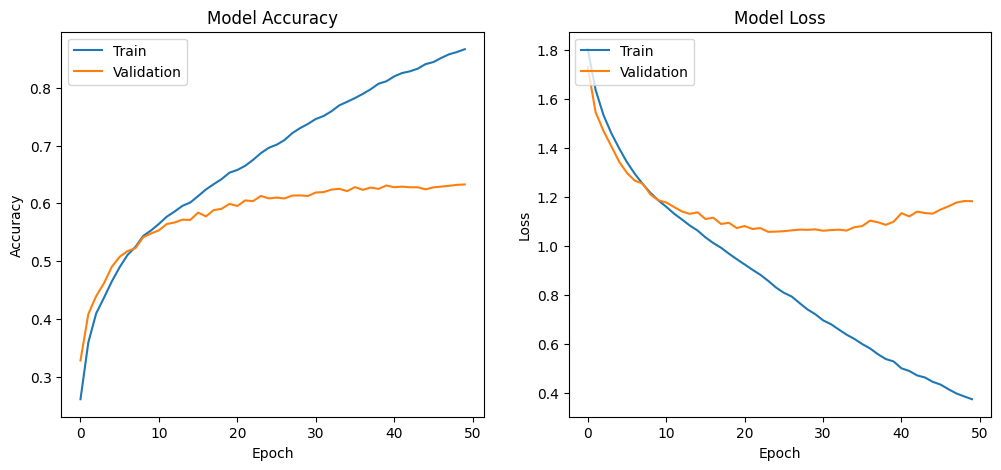

In [39]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()